 Exploratory Data Analysis which involves data cleaning and analysis to understand the nature of data using different 
 statististical technics, such as measures of central tendencies, measures of dispersion, and measures of frequency.
 Visualization of the data using charts, box plots, scatter plots and histograms with the help of Matplotlib and Seaborn 
 in python. Further analysis involves enhancing the data against errors in order to be used for linear regression to predict 
 outcomes by applying the correlation analysis, normality and standardization technics.

In [100]:
import pandas as pd                       # importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
file = pd.read_csv("marketing_customer_analysis.csv") # readind the data for onward analyses
file.shape

(10910, 26)

In [102]:
file.columns = [e.lower().replace(' ', '_') for e in file.columns]

In [103]:
file.isna().values.any() # checking if NaN values exist

True

In [104]:
file.isna().sum() # calculating the number of NaN values column by column

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [105]:
file['vehicle_type'] = file['vehicle_type'].fillna('M')
file = file.dropna()
#file

In [106]:
file = file.drop(columns = ['unnamed:_0'])

In [107]:
file['effective_to_date'] = pd.to_datetime(file['effective_to_date']) # extracting date-months from date
file['month'] = file['effective_to_date'].dt.month # extracting month from datetime

months_to_filter = [1, 2, 3]                          # filtering by months; januanry to March only
file[file['month'].isin(months_to_filter)]
#file

C:\Users\Admin\AppData\Local\Temp\ipykernel_11468\3710263061.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file['effective_to_date'] = pd.to_datetime(file['effective_to_date']) # extracting date-months from date


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [108]:
#numeric_f = file.select_dtypes(np.number)
file_num = file.select_dtypes(include ='number') # numerical data
#file_num

In [109]:
#file.select_dtypes(object)
file_cat = file.select_dtypes(include = object)
#file_cat

# Exploring the data using charts and histograms (Exploratory Data Analysis)

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

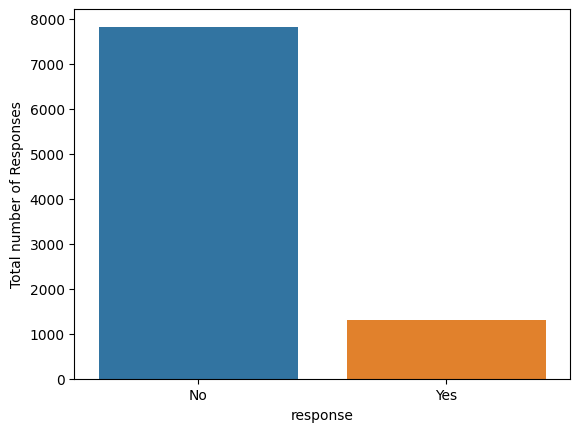

In [111]:
sns.countplot(x = 'response', data = file) # response graph
plt.ylabel('Total number of Responses')
plt.show()

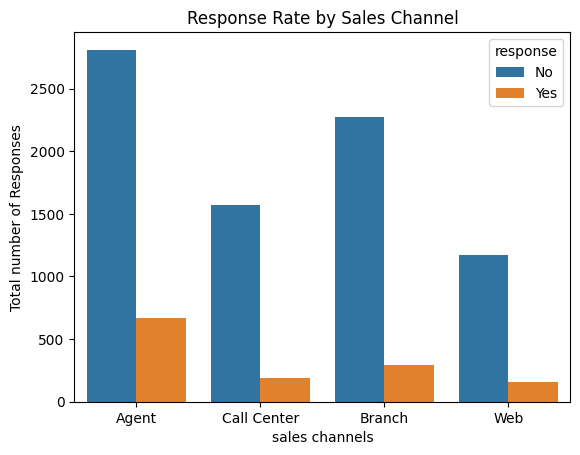

In [112]:
sns.countplot(x = 'sales_channel', hue = 'response', data = file) # response by total sales amount
plt.ylabel('Total number of Responses')
plt.xlabel('sales channels')
plt.legend(title = 'response')
plt.title('Response Rate by Sales Channel')
plt.show()

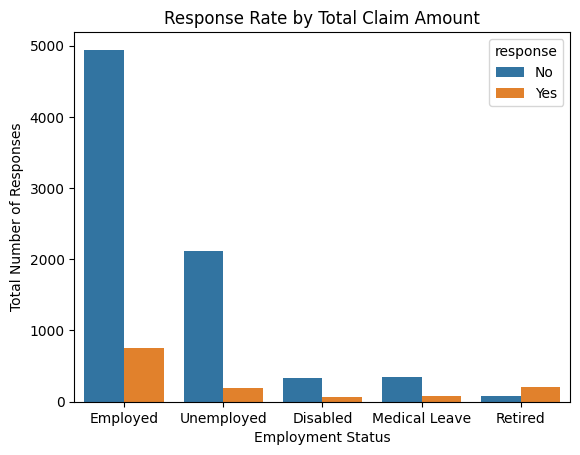

In [113]:
sns.countplot(x = 'employmentstatus', hue = 'response', data = file) # response by total claim amount
plt.ylabel('Total Number of Responses')
plt.xlabel('Employment Status')
plt.legend(title = 'response')
plt.title('Response Rate by Total Claim Amount')
plt.show()

# Checking the Normality of the Data

In [114]:
file_num.describe().T # transposing the data for further analyses especially with respect to correlation (Describing the data)

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


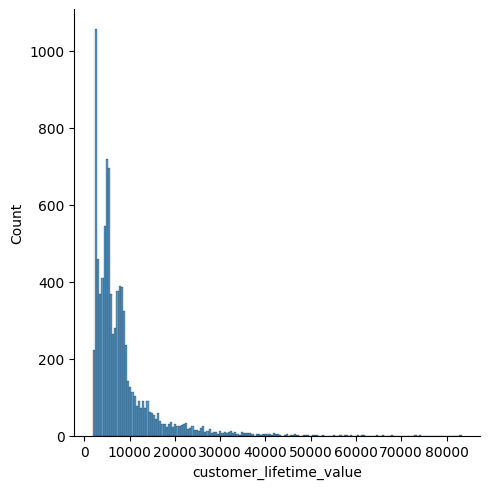

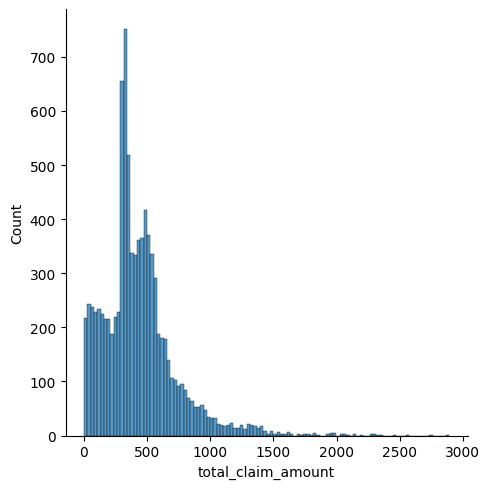

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


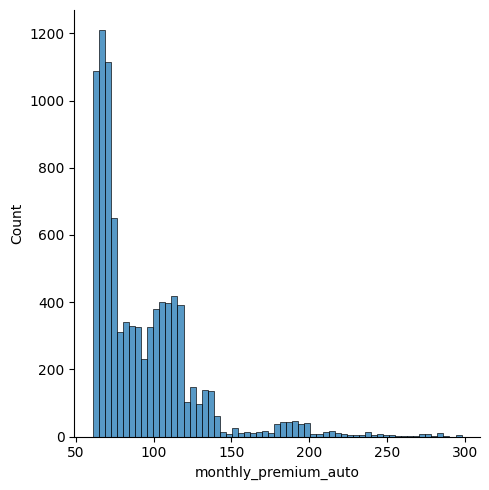

In [115]:
def distrplots(file_num):
    sns.displot(file_num['customer_lifetime_value']) # distribution graph for 'Customer Lifetime Value' in view of the presence of errors
    plt.show()
    
    sns.displot(file_num['total_claim_amount'])    # distribution for 'Total Claim Amount'
    plt.show()
    
    sns.displot(file_num["monthly_premium_auto"]) # distribution for 'Monthly Premium Auto'
    plt.show
    
    return file_num
distrplots(file_num)

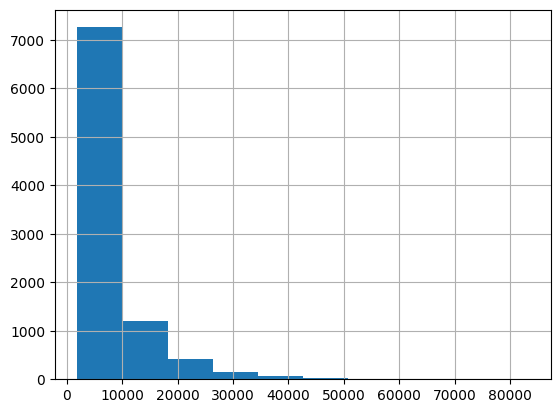

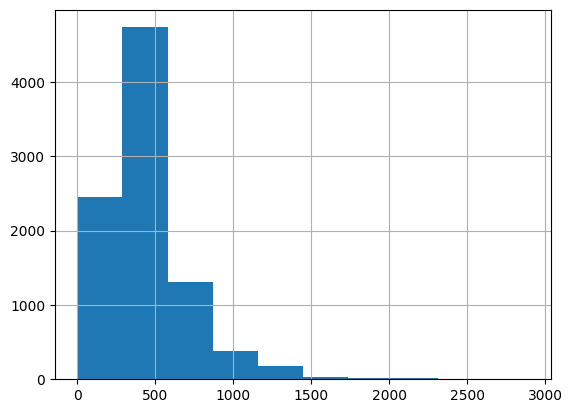

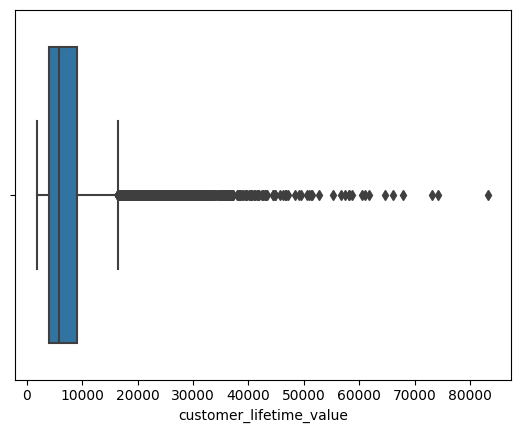

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [116]:
def distrcharts(file_num):
    file_num['customer_lifetime_value'].hist() # distribution graph for 'Customer Lifetime Value' in view of the presence of errors
    plt.show()
    
    file_num['total_claim_amount'].hist()    # distribution for 'Total Claim Amount'
    plt.show()
    
    sns.boxplot(x=file_num['customer_lifetime_value'])  # boxplot for the assessment of errors in the data using the upper and lower limits as thresholds for determining outliers
    plt.show()
    
    return file_num
distrcharts(file_num)

In [117]:
iqr = np.percentile(file_num['customer_lifetime_value'],75) - np.percentile(file_num['customer_lifetime_value'],25)
upper_limit = np.percentile(file_num['customer_lifetime_value'],75) + 0.44*iqr
lower_limit = np.percentile(file_num['customer_lifetime_value'],25) - 0.00045*iqr # finding upper and lower limits to used in refining the results

In [118]:
iqr

4967.915247000001

In [119]:
upper_limit

11148.04974993

In [120]:
lower_limit

3992.01623238885

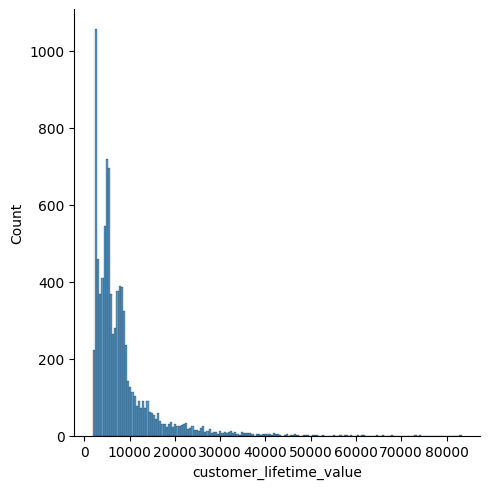

In [121]:
file_num1 = file_num[(file_num['customer_lifetime_value']>lower_limit) & (file_num['customer_lifetime_value']<upper_limit)].copy()
sns.displot(file_num['customer_lifetime_value'])
plt.show()   # applying the result to determine if the data can is normally distributed after cleaning; but not so good

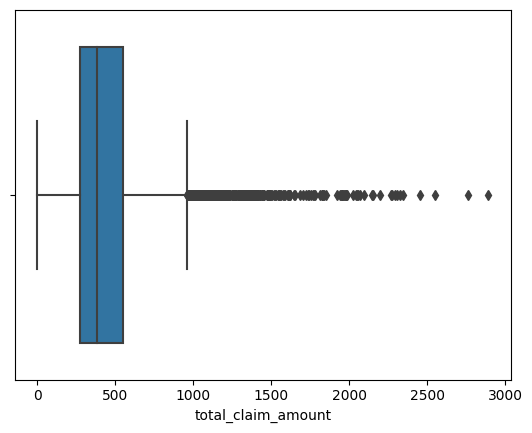

In [122]:
sns.boxplot(x=file_num['total_claim_amount'])    # boxplot for 'total-claim_amount'
plt.show()

In [123]:
iqr = np.percentile(file_num['total_claim_amount'],75) - np.percentile(file_num['total_claim_amount'],25)
upper_limit = np.percentile(file_num['total_claim_amount'],75) + 0.9*iqr
lower_limit = np.percentile(file_num['total_claim_amount'],25) - 0.51*iqr   # same as above, but for 'Total Claim Amount'

In [124]:
iqr

275.25659425

In [125]:
upper_limit

795.2457735749999

In [126]:
lower_limit

131.8773814325

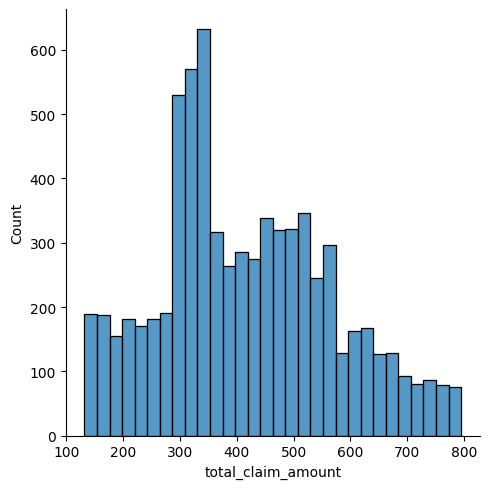

In [127]:
file_num1 = file_num[(file_num['total_claim_amount']>lower_limit) & (file_num['total_claim_amount']<upper_limit)].copy()
sns.displot(file_num1['total_claim_amount'])   # normality not so good
plt.show()

In [128]:
file_num1 = file_num.drop("total_claim_amount", axis = 1) # 'Total Claim Amount' dropped from DataFrame in order to use only the features alone for further nalyses and prediction
file_num1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,4809.216960,48029,61,7.0,52,0.0,9,2
1,2228.525238,0,64,3.0,26,0.0,1,1
2,14947.917300,22139,100,34.0,31,0.0,2,2
3,22332.439460,49078,97,10.0,3,0.0,2,1
6,5035.035257,37405,63,8.0,99,3.0,4,2
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,1
10904,19228.463620,0,187,14.0,32,0.0,2,2
10906,5259.444853,61146,65,7.0,68,0.0,6,1
10907,23893.304100,39837,201,11.0,63,0.0,2,2


In [129]:
correlations_matrix = file_num1.corr()     # correlation matrix to see pairs that influence each other
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305
month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000


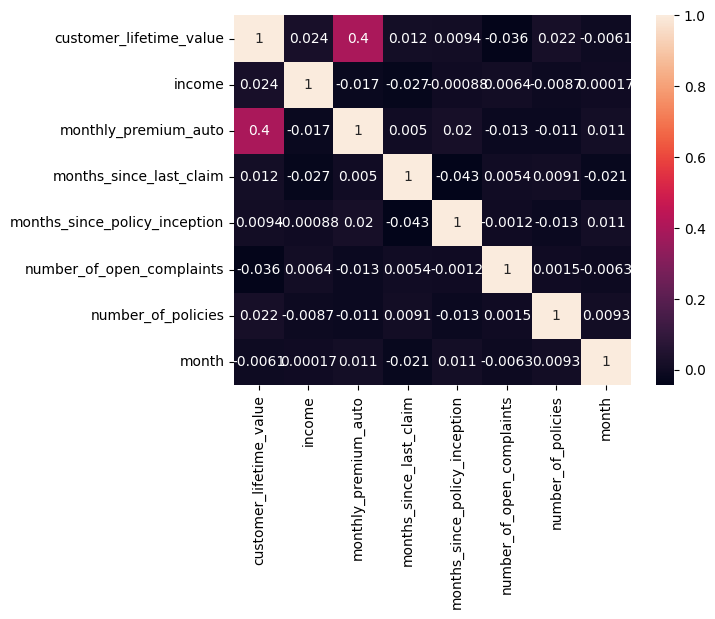

In [130]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation. with black showing the least correlated pairs. Correlation here is very low for all except self correlated pairs 
plt.show()

# Normalizing/Scaling and Splitting the Data

In [131]:
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler # # importing libraries for trnaformation
from sklearn.preprocessing import StandardScaler

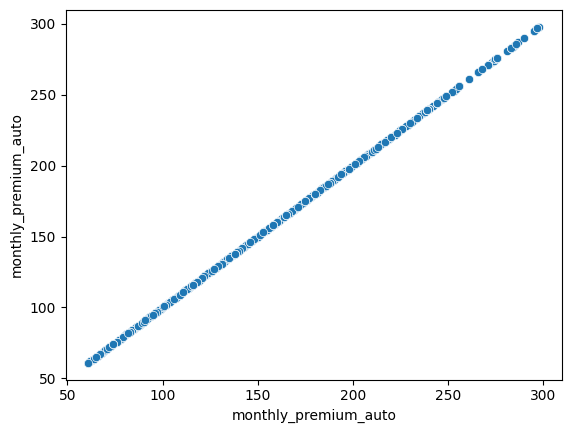

In [132]:
sns.scatterplot(x = file_num1['monthly_premium_auto'], y= file_num1['monthly_premium_auto'], data = file)
plt.show()

In [133]:
y = file_num['total_claim_amount']                       #splitting X and y
X = file_num1
X.fillna(0, inplace = True)
X_num = X.select_dtypes(include = np.number)
X_cat = file_cat.select_dtypes(include = object) 

In [134]:
y

0        292.800000
1        744.924331
2        480.000000
3        484.013411
6        287.556107
            ...    
10903    355.200000
10904    897.600000
10906    273.018929
10907    381.306996
10908    618.288849
Name: total_claim_amount, Length: 9134, dtype: float64

In [135]:
# applying the log transform to the numerical data in order to assume normality
filtered_X = X[X>0]
adjusted_X = np.where(filtered_X == 0, filtered_X + 0.01, filtered_X)
X = np.log(adjusted_X )

In [136]:
transformer = StandardScaler().fit(X_num) # alternative method for normalising the data
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized, columns=X_num.columns)

(9134, 8)


In [137]:
pd.DataFrame(x_standardized, columns=X_num.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,3.733967e-17,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
income,9134.0,7.234560e-17,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
monthly_premium_auto,9134.0,-1.524703e-16,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
months_since_last_claim,9134.0,4.239608e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months_since_policy_inception,9134.0,1.034620e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number_of_open_complaints,9134.0,6.378860e-17,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number_of_policies,9134.0,-2.761579e-17,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561
month,9134.0,-2.605998e-17,1.000055,-0.929969,-0.929969,-0.929969,1.075304,1.075304


In [138]:
# encoding categorical data
from sklearn.preprocessing import OneHotEncoder
X_cat = X_cat[['response', 'gender', 'vehicle_type']]
encoder = OneHotEncoder(drop='first')
encoder = encoder.fit(X_cat)
encoded_cat = encoder.transform(X_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_cat.columns)

onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,response_Yes,gender_M,vehicle_type_M
0,0.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,1.0,0.0
4,0.0,0.0,1.0


In [139]:
x_standardized = pd.DataFrame(x_standardized)
onehot_encoded = pd.DataFrame(onehot_encoded)
X_treated = pd.concat([x_standardized, onehot_encoded], axis=1)
X_treated

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_Yes,gender_M,vehicle_type_M
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,1.075304,0.0,1.0,1.0
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,-0.929969,0.0,0.0,1.0
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,1.075304,0.0,1.0,0.0
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,-0.929969,1.0,1.0,0.0
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,1.075304,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.761692,0.730708,-0.558602,1.479543,1.216128,3.971744,-0.822648,-0.929969,0.0,1.0,0.0
9130,1.633560,-1.239617,2.725701,-0.108908,-0.575700,-0.422250,-0.404247,1.075304,0.0,1.0,0.0
9131,-0.399601,0.773205,-0.820183,-0.803856,0.714416,-0.422250,1.269358,-0.929969,0.0,0.0,0.0
9132,2.312518,0.071749,3.132606,-0.406743,0.535234,-0.422250,-0.404247,1.075304,0.0,0.0,1.0


In [140]:
import matplotlib.pyplot as pls
from sklearn.model_selection import train_test_split
X = X_treated
X_train, X_test, y_train, y_test = train_test_split(X_treated, y, test_size=0.4, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5480, 11)
(3654, 11)
(5480,)
(3654,)


In [141]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_Yes,gender_M,vehicle_type_M
1220,0.003427,-1.239617,-0.558602,1.082430,1.287801,-0.422250,-0.404247,-0.929969,0.0,0.0,0.0
2929,-0.758033,1.307008,-0.674860,-0.108908,-0.826556,-0.422250,-0.822648,-0.929969,0.0,1.0,1.0
657,-0.591028,-0.144030,0.197079,0.883874,0.642743,0.676249,-0.822648,-0.929969,0.0,0.0,0.0
3301,-0.297175,1.624933,-0.558602,-0.903134,1.287801,-0.422250,2.106160,-0.929969,0.0,0.0,0.0
4825,-0.579568,-1.239617,0.691177,-0.903134,-1.686633,-0.422250,-0.822648,-0.929969,0.0,1.0,0.0


In [142]:
y_train.head()

1495    532.800000
3541    386.599797
801     207.510821
3994    331.116399
5817    975.107098
Name: total_claim_amount, dtype: float64

# Applying the Linear Model

In [143]:
lm = linear_model.LinearRegression() # linear model
lm.fit(X_train,y_train)

LinearRegression()

# Model Validation

In [144]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5177771842627023

In [145]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5303091064099947

In [146]:
y_test[:5]

855     456.523850
52      406.902001
4816    128.516525
1844    110.868874
4457    106.737787
Name: total_claim_amount, dtype: float64

In [147]:
predictions_test[:5]

array([658.93937373, 210.66202302, 185.72285511, 190.57369632,
       217.33872752])

In [148]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

39799.058902245095

In [149]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

199.4970147702594

In [150]:
from sklearn.metrics import mean_absolute_error

In [151]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

144.0192844088975


In [152]:
y_test.mean()

426.7272643453749

# Conclusion and Inference

Based on the model's metrics; Mean Squared Error (MSE) of 39799 suggests a significant deviation from the actual values, but a Root Mean squared Error suggests a moderate average magitude of the errors. On the other hand, the Mean Absolute Error (MAE) of 144, on the average, signifies that the model's predictions have an absolute difference of 144 units from the actual values. Given the mean of the y_test data; 426, provides the context for understanding the magnitude of the erros in relation to the average value of the target variables.

The prediction value of the test data being 0.53 and and 0.51 for the entire dataset looks promising, however, it appears that the model may not be performing optimally. The relatively high matric values (MSE, MAE) indicates the presence of significant errors in the model despite measures taken to optimize it. These development could be a result of unrealistic or formulated, this could be seen from the HeatMap output which shows significant lack of correlation between the data variables.

With the approach adopted in doing this analysis, if a more realistic dataset is employed, the outcome could be be different. Not witstanding, further investigation and analysis may idnetify potential areas of improvement, such feature engineering, model selection etc.